In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import random
import matplotlib.pyplot as plt

In [2]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [3]:
df = pd.read_csv('../../Data/final_cool_dataset.csv')
edges = [(row['ORIGIN'], row['DEST'], {'weight': row['PASSENGERS']}) for _, row in df.iterrows()]

G = nx.DiGraph()
G.add_edges_from(edges)

<class 'numpy.ndarray'>
182
Average degree:  144.46070555778167


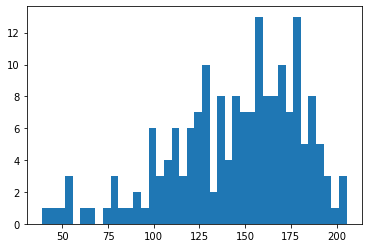

In [49]:
max_degree = sorted(G.degree, key=lambda x: x[1], reverse=True)[0][1]

degrees = np.zeros((max_degree+1,1))
avg_nb_degrees_1 = np.zeros((max_degree+1,1)) # this contains total amount of neighbors
avg_nb_degrees_2 = np.zeros((max_degree+1,1)) # this contains total amount of nodes (the denominator for calculating average)

for n in G.nodes():
    degrees[G.degree(n)] += 1
    avg_nb_degrees_1[G.degree(n)] += np.mean(np.array([G.degree(nb) for nb in G.neighbors(n)]))
    avg_nb_degrees_2[G.degree(n)] += 1
    
    
a, b = [],[]
for i in range(len(avg_nb_degrees_1)):
    if i == 1:         print(type(avg_nb_degrees_1[i])) # debug print
    if avg_nb_degrees_2[i] != 0:
        avg_nb_degrees_1[i] = avg_nb_degrees_1[i] / avg_nb_degrees_2[i]
        a.append(avg_nb_degrees_1[i][0]) # this is avg_nb_degrees but without 0s
        b.append(i) # this corresponds to a, but elements are the degrees.

avg_degree = np.average(a)

plt.hist(a, bins=40)
print(len(a))
#print(avg_nb_degrees_1)
print("Average degree: ", avg_degree)

In [39]:
print(a)

[131.13533834586465, 162.59821428571428, 120.85858585858587, 102.3047619047619, 115.22764227642276, 126.83380952380952, 118.23611111111109, 123.5938888888889, 96.57207792207794, 97.5641369047619, 139.1845864661654, 107.83473084886131, 98.95969089390141, 129.6111020923521, 131.69337606837607, 110.17735449735451, 81.2036756453423, 138.68791486291482, 127.48869047619047, 101.32013403263403, 129.92158767158767, 91.43208327620091, 150.2251984126984, 74.18566849816848, 128.11693003965732, 108.52949328449328, 109.54957681207682, 123.16025521319638, 98.27350568821157, 138.82365510306687, 126.61111111111111, 189.7974598930481, 122.86495466607697, 136.02537931839402, 138.7893382352941, 122.54608187134504, 105.80550781716195, 77.95187969924811, 146.61528822055138, 97.55759758448835, 129.56598825992847, 109.96961371562222, 153.97651201455548, 79.89505574136008, 113.84620370370371, 127.02992242114237, 97.6464815211442, 134.74782027962107, 159.39962121212122, 53.326086956521735, 120.95798319327731, 

In [6]:
G.get_edge_data("ACK", "JFK")
G["JFK"]['ACK'].get('weight')

25704.0

In [7]:
G.size(weight = "weight")

603512939.0

<h1> Degree Assortativity and Degree Prediction </h1>

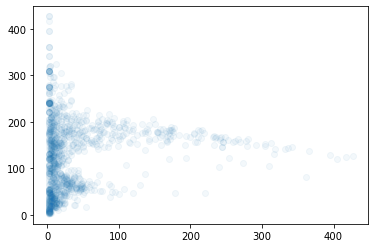

In [22]:
x, y = [],[]
for n in G.nodes():
    x.append(G.degree(n))
    nb_degrees = np.array([G.degree(nb) for nb in G.neighbors(n)])
    y.append(np.mean(nb_degrees))
x = np.array(x)
y = np.array(y)
    
plt.scatter(x,y, alpha=0.05)

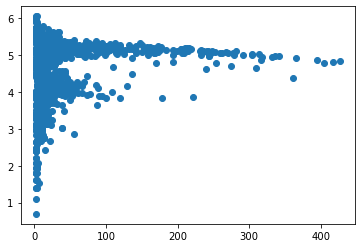

In [9]:
y = np.log(y)

plt.scatter(x,y)

Also Pearson coeff is 0.05 (degree assortativity), so no correlation. So can't predict degree of neighbours from degree only. 

0
1
2
3
4
5
6
7
8
9
[None, None, None, None, None, None, None, None, None, None]


<h1> Epidemic SI model </h1>

In [105]:
from scipy.integrate import odeint

def model(i, beta, k, t):
    return beta * k * i * (1 - i)

def degree_model(i, beta, k, fk, t):
    return beta * k * fk * (1 - i)

beta = 0.01
k = avg_degree
steps = 20
i0 = 0.001
t = list(range(steps + 1))

i = odeint(model, i0, t, args = (beta, k))
# print(i)

# using degrees... OBS: a is neighbor average degree of node of degree value of index... Poor wording
frac_infected_nodes_of_degree_k = [] # indices of this list will correspond with indices of list b, and elements of b are the degrees
for i in range(len(a)):
    # append tuple, first element is ndarray of the fraction of infected nodes of degree k for 20 timesteps, second element is k
    frac_infected_nodes_of_degree_k.append( ( odeint(degree_model, i0, t, args = (beta, b[i], a[i])), b[i])) 


In [106]:
# iterate through frac_infected_nodes_of_degree_k and count timesteps before some threshold, and then plot those.
def count_timesteps_till_threshold(l, t): 
    c = 1
    for i in l:
        if i > t: return c
        c += 1
        
threshold = 0.95
steps_till_saturation = []    
for t in frac_infected_nodes_of_degree_k:
    steps_till_saturation.append(count_timesteps_till_threshold(t[0], threshold))
    
print(steps_till_saturation)
print(b)

[19, 16, 14, 12, 11, 11, 10, 10, 9, 9, 9, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 59, 61, 62, 63, 64, 66, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 99, 100, 101, 102, 104, 106, 107, 108, 109, 110, 112, 114, 116, 119, 120, 125, 126, 130, 132, 136, 1

[(array([[1.00000000e-03],
         [3.94075842e-01],
         [8.64800051e-01],
         [9.88902107e-01],
         [9.99664871e-01],
         [9.99996279e-01],
         [9.99999984e-01],
         [1.00000000e+00],
         [1.00000000e+00],
         [1.00000000e+00],
         [1.00000000e+00],
         [1.00000000e+00],
         [1.00000000e+00],
         [1.00000000e+00],
         [1.00000000e+00],
         [1.00000000e+00],
         [1.00000000e+00],
         [1.00000000e+00],
         [1.00000000e+00],
         [1.00000000e+00],
         [1.00000000e+00]]),
  2),
 (array([[1.00000000e-03],
         [5.28105803e-01],
         [9.50262714e-01],
         [9.98830291e-01],
         [9.99993866e-01],
         [9.99999992e-01],
         [1.00000000e+00],
         [1.00000000e+00],
         [1.00000000e+00],
         [1.00000000e+00],
         [1.00000000e+00],
         [1.00000000e+00],
         [1.00000000e+00],
         [1.00000000e+00],
         [1.00000000e+00],
         [1.00000000

The clustering coefficient of a node is the amount of connection between it's neighbours over the amount of possible connections between it's neighbours. It is calculated in the following way: $c_u = \frac{2T(u)}{deg(u)(deg(u)-1}$, 

where $deg(u)$ is the degree of $u$ and $T(u)$ is the amount of triangles with a vertex in $u$.  

(PLOT THIS CLUSTERING COEFFICIENTS FROM MARTIN NOTEBOOK AND DISCUSS) 

The average clustering coefficient of the graph is $0.562$. It is calculated as $C = \frac{number\hspace{2mm} of\hspace{2mm} closed \hspace{2mm}triplets}{number\hspace{2mm} of \hspace{2mm}all \hspace{2mm}triplets \hspace{2mm}(open \hspace{2mm}and\hspace{2mm} closed)}$. 

DISCUSS AVERAGE CLUSTERING COEFFICIENT


The diameter of the network is 7. 

In [5]:
sorted(G.in_degree, key=lambda x: x[1], reverse=True)

[('ATL', 202),
 ('MSP', 201),
 ('DEN', 195),
 ('ORD', 183),
 ('ANC', 178),
 ('DFW', 176),
 ('DTW', 161),
 ('MEM', 160),
 ('IAH', 156),
 ('SDF', 150),
 ('LAS', 149),
 ('IAD', 146),
 ('LAX', 145),
 ('BWI', 141),
 ('EWR', 140),
 ('BUR', 137),
 ('YIP', 135),
 ('CLT', 134),
 ('IND', 132),
 ('CLE', 131),
 ('MIA', 130),
 ('PHL', 127),
 ('IFP', 126),
 ('PHX', 125),
 ('DCA', 120),
 ('MCO', 120),
 ('MKE', 120),
 ('MCI', 120),
 ('AUS', 118),
 ('COS', 117),
 ('SHV', 116),
 ('MDW', 113),
 ('STL', 113),
 ('JFK', 112),
 ('OKC', 112),
 ('SLC', 111),
 ('SEA', 109),
 ('FLL', 107),
 ('BOS', 106),
 ('HPN', 105),
 ('MSY', 105),
 ('SAT', 104),
 ('SFO', 103),
 ('BNA', 103),
 ('DAL', 103),
 ('FAI', 102),
 ('TYS', 102),
 ('PIT', 101),
 ('RDU', 100),
 ('RIC', 99),
 ('CVG', 98),
 ('LGA', 97),
 ('CAE', 96),
 ('BHM', 95),
 ('CMH', 93),
 ('TPA', 93),
 ('OAK', 93),
 ('GSP', 90),
 ('PDX', 89),
 ('GRR', 89),
 ('SAN', 85),
 ('LRD', 85),
 ('DSM', 84),
 ('ELP', 84),
 ('SJC', 84),
 ('SFB', 84),
 ('BET', 83),
 ('BUF', 83),

<h3> Longest shortest path </h3>

We found the diameter of the network is 7. We find the longest shortest paths by going through all the shortest paths between every pair of nodes and check if their length is 7.

<h3> Clustering coefficient </h3>

The clustering coefficient of a node is the amount of connection between it's neighbours over the amount of possible connections between it's neighbours. It is calculated in the following way: $c_u = \frac{2T(u)}{deg(u)(deg(u)-1}$, 

where $deg(u)$ is the degree of $u$ and $T(u)$ is the amount of triangles with a vertex in $u$.  

The average clustering coefficient of the graph is $0.562$. It is calculated as $C = \frac{number\hspace{2mm} of\hspace{2mm} closed \hspace{2mm}triplets}{number\hspace{2mm} of \hspace{2mm}all \hspace{2mm}triplets \hspace{2mm}(open \hspace{2mm}and\hspace{2mm} closed)}$. 

<h3> Degree assortativity </h3>

The degree assortativity is the correlation between a node's degree and the degree of it's neighbors. The Pearson coefficient of the degree assortativity is 0.05, so no correlation. The network is disassortative. This means that we can't predict degree of neighbours from degree only. 

<h3> Community Discovery (Label propagation)  </h3>